## Train VAE on MR normalized data

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2
import os
import pandas as pd
import seaborn as sns
from ponyo import utils, train_vae_modules
from generic_expression_patterns_modules import process

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
# Set seeds to get reproducible VAE trained models
process.set_all_seeds()

In [3]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Read in config variables
config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general_MRnorm.tsv")
)

params = utils.read_config(config_filename)

local_dir = params["local_dir"]
dataset_name = params["dataset_name"]

# File that contains gene ranks identified by Crow et. al.
DE_prior_filename = params["reference_gene_filename"]

# Template experiment ID
project_id = params["project_id"]

# Output files of recount2 template experiment data
# processed_template_filename = params["processed_template_filename"]

# Output files of recount2 compendium data
MRnormalized_compendium_filename = params["MRnormalized_compendium_filename"]
normalized_compendium_filename = params["normalized_compendium_filename"]


# Output file: pickled scaler (generated during compendium normalization)
scaler_filename = params["scaler_filename"]

# Output: size factor for MR normalization
sf_filename = "data/metadata/MR_norm_compendium_size_factor.tsv"

In [4]:
# Create VAE directories if needed
output_dirs = [
    os.path.join(base_dir, dataset_name, "models"),
    os.path.join(base_dir, dataset_name, "logs"),
]

NN_architecture = params["NN_architecture"]

# Check if NN architecture directory exist otherwise create
for each_dir in output_dirs:
    sub_dir = os.path.join(each_dir, NN_architecture)
    os.makedirs(sub_dir, exist_ok=True)

input dataset contains 49651 samples and 17755 genes
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=() dtype=float32> beta
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output custom_variational_layer_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_1.
  'be expecting any data to be passed to {0}.'.format(name))



Train on 37238 samples, validate on 12413 samples
Epoch 1/10
37238/37238 [==============================] - 784s 21ms/step - loss: 202.9662 - val_loss: 55.6368
Epoch 2/10
37238/37238 [==============================] - 789s 21ms/step - loss: 51.4585 - val_loss: 48.2838
Epoch 3/10
37238/37238 [==============================] - 790s 21ms/step - loss: 48.4011 - val_loss: 47.1604
Epoch 4/10
37238/37238 [==============================] - 790s 21ms/step - loss: 46.9871 - val_loss: 46.0539
Epoch 5/10
37238/37238 [==============================] - 790s 21ms/step - loss: 46.3898 - val_loss: 47.1414
Epoch 6/10
37238/37238 [==============================] - 789s 21ms/step - loss: 45.9577 - val_loss: 45.9570
Epoch 7/10
37238/37238 [==============================] - 792s 21ms/step - loss: 45.5596 - val_loss: 45.5525
Epoch 8/10
37238/37238 [==============================] - 786s 21ms/step - loss: 45.2465 - val_loss: 45.4173
Epoch 9/10
37238/37238 [==============================] - 791s 21ms/step - l

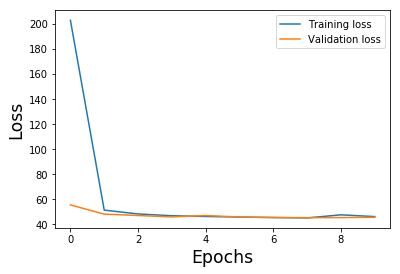

In [5]:
# Train VAE on new compendium data
train_vae_modules.train_vae(config_filename, normalized_compendium_filename)